In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleaned-train-df/cleanedTrain.csv


In [2]:
cleaned_train_df=pd.read_csv("/kaggle/input/cleaned-train-df/cleanedTrain.csv")
cleaned_train_df.head()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,outlet_city_Batticaloa,outlet_city_Colombo,outlet_city_Dehiwala-Mount Lavinia,outlet_city_Galle,outlet_city_Gampaha,...,outlet_city_Kelaniya,outlet_city_Kotte,outlet_city_Moratuwa,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala,total_sales
0,10493832,-0.709489,-1.101399,0.180599,4,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,-0.982408
1,10178643,-0.330507,-1.010208,0.390355,1,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,-0.617597
2,10513916,0.365429,-0.883967,1.313829,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0.494808
3,10334589,0.351545,-0.806410,1.297473,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0.544047
4,10458365,0.421810,-0.707480,1.339778,4,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,0.686005


In [3]:
X = cleaned_train_df[['luxury_sales', 'fresh_sales', 'dry_sales',
       'outlet_city_Batticaloa', 'outlet_city_Colombo',
       'outlet_city_Dehiwala-Mount Lavinia', 'outlet_city_Galle',
       'outlet_city_Gampaha', 'outlet_city_Homagama', 'outlet_city_Jaffna',
       'outlet_city_Kaduwela', 'outlet_city_Kalmunai', 'outlet_city_Kandy',
       'outlet_city_Katunayake', 'outlet_city_Kelaniya', 'outlet_city_Kotte',
       'outlet_city_Moratuwa', 'outlet_city_Negombo',
       'outlet_city_Nuwara Eliya', 'outlet_city_Panadura',
       'outlet_city_Peliyagoda', 'outlet_city_Trincomalee',
       'outlet_city_Wattala', 'total_sales']]
y = cleaned_train_df['cluster_catgeory']

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
y_pred = clf.predict(X_val)

In [7]:
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Accuracy: 0.9997674869211393
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37863
           2       1.00      1.00      1.00     30989
           3       1.00      1.00      1.00      9645
           4       1.00      1.00      1.00     34418
           5       1.00      1.00      1.00      7934
           6       1.00      1.00      1.00     33981

    accuracy                           1.00    154830
   macro avg       1.00      1.00      1.00    154830
weighted avg       1.00      1.00      1.00    154830



Get feature importances

In [8]:
feature_importances = clf.feature_importances_
features = X.columns

Create a DataFrame for visualization

In [9]:
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

Plot feature importances

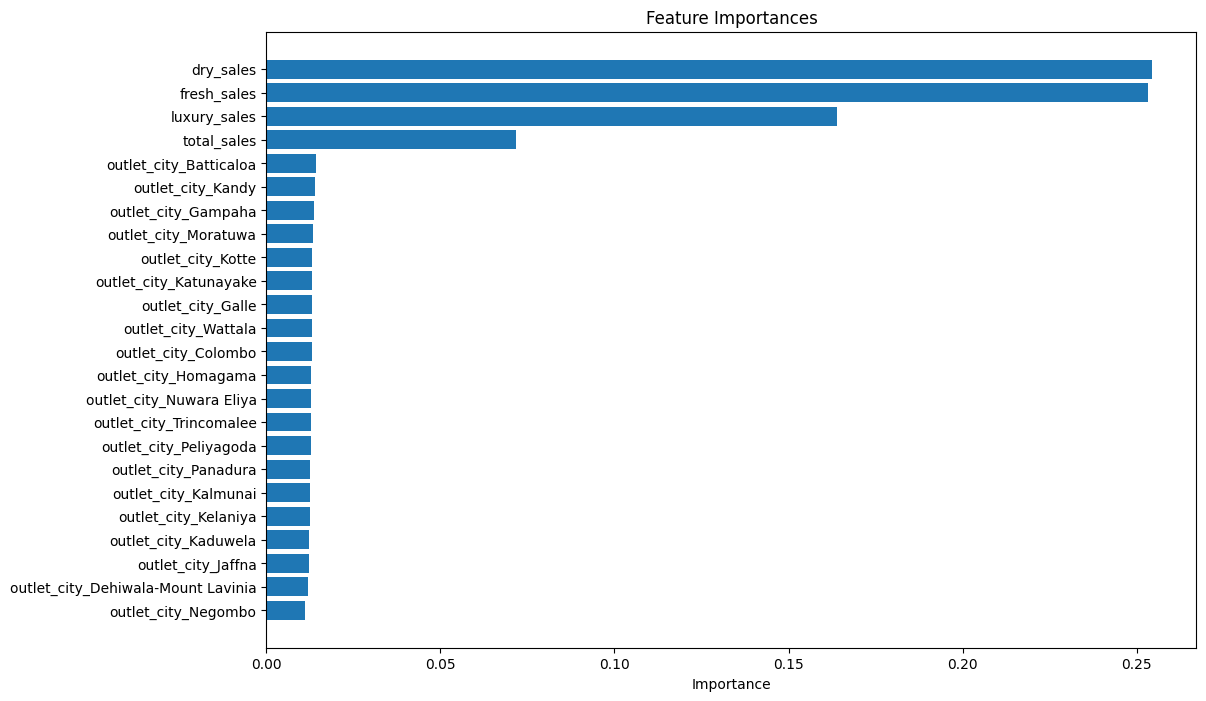

In [10]:
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

Calculate correlation matrix

In [11]:
correlation_matrix = cleaned_train_df.corr()

Plot heatmap

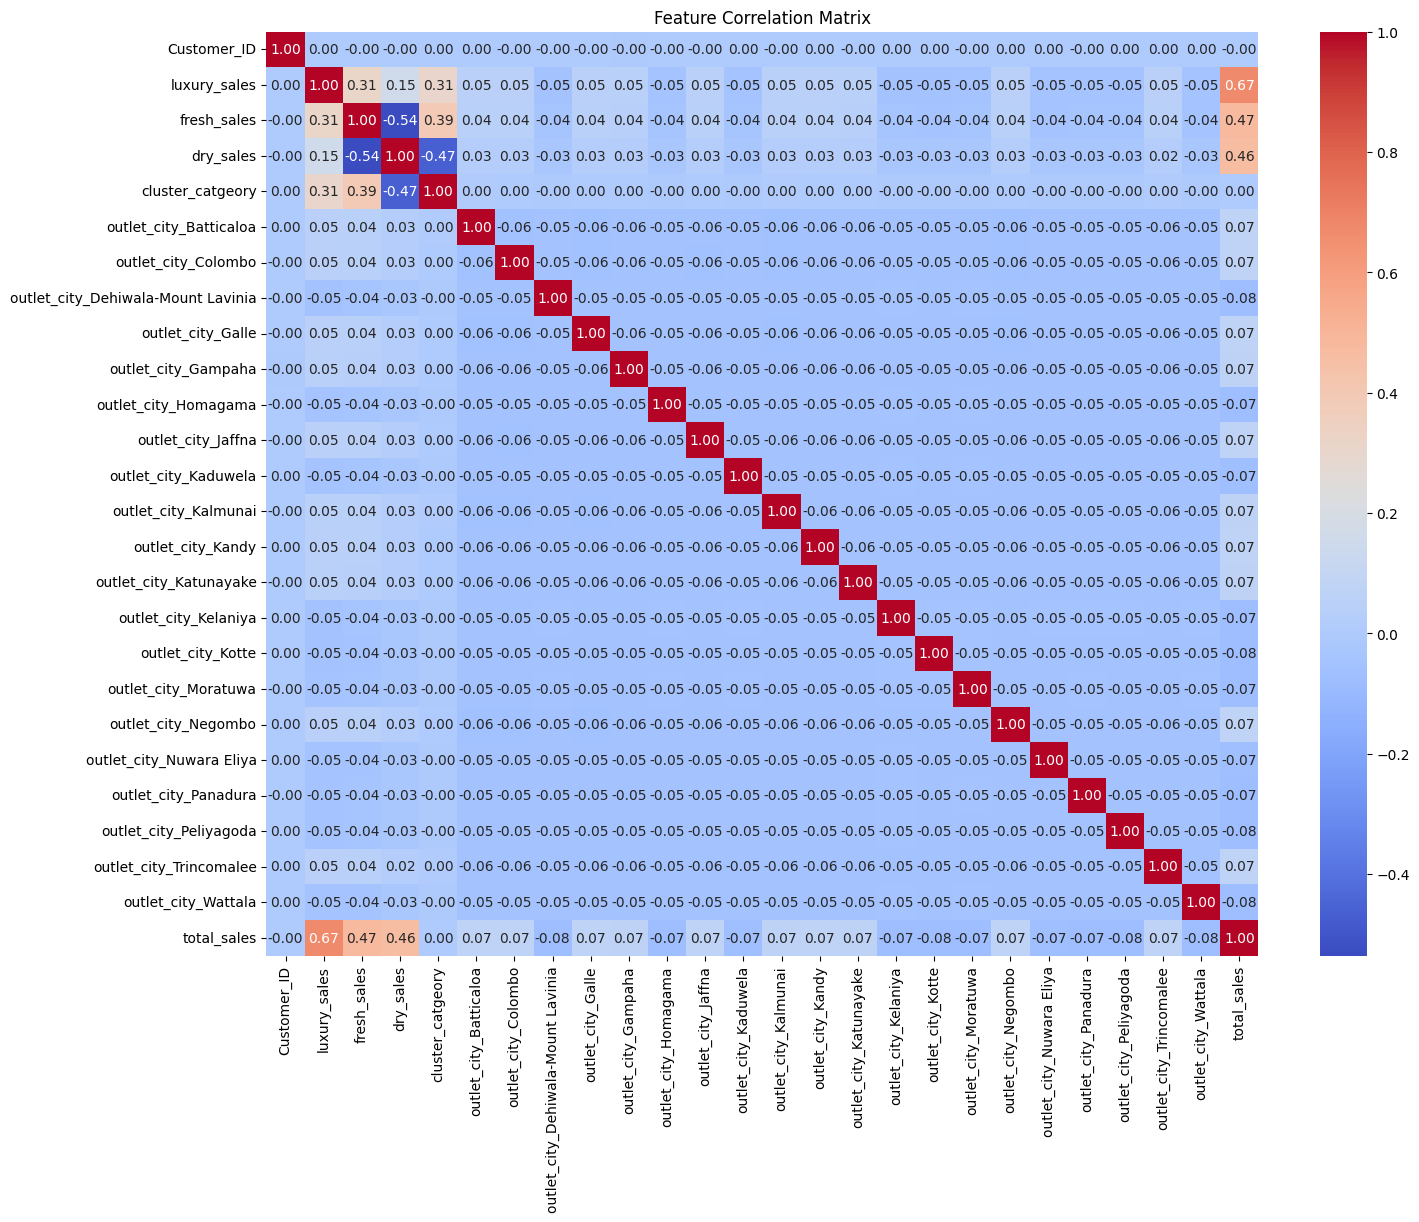

In [12]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()